<a href="https://colab.research.google.com/github/datalou/Data-Science/blob/master/Regresion_Lineal_simple_creacion_de_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regresión lineal simple**

Es momento de crear mi primer modelo de aprendizaje, el más sencillo de todos que es la regresión lineal, se necesita un atributo y lo que debe predecir.

Lo primero que hare será importar todas las bibliotecas con las que trabajare.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import io
from google.colab import files
uploaded = files.upload()




Saving salarios_32849f3e-7f53-4139-b334-b8de8beb144a.csv to salarios_32849f3e-7f53-4139-b334-b8de8beb144a.csv


Ahora importemos dos librerias, por un lado la que nos ayudará a dividir nuestros datos en entrenamiento y prueba. Recordemos que los algoritmos de aprendizaje deben tener siempre este procedimiento.



In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

Ahora carguemos un archivo que tendrás disponible para tus pruebas que se llama salarios. Y veamos que es lo que tiene.

In [3]:
dataset = pd.read_csv('salarios_32849f3e-7f53-4139-b334-b8de8beb144a.csv')


Muestra dos columnas con las cuáles va a aprender al algoritmo, por un lado son los años de experiencia y por otro es el salario. El objetivo es encontrar esa relación entre ambos, es decir, saber cuántos años de experiencia necesito para ganar aproximadamente cierta cantidad.

In [4]:
dataset.head(5)

,Aexperiencia,Salario
0,10.0,42500
1,8.0,36302
2,5.4,35000
3,2.5,18103
4,1.0,15000


Tenemos 30 ejemplos y dos columnas

In [5]:
dataset.shape

(30, 2)

Ahora vamos a dividir los datos en X y Y. Donde Y es la variable 

In [6]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

test_size = 1 / 3

test_size = 0.2 -> Hemos dividido el conjunto de datos en una proporción de 80% entrenamiento - 20% de prueba, que es una práctica común en la ciencia de datos.

El parámetro random_state se utiliza para reordenar los datos, si pasamos el valor de 0 entonces todas y cada una de las veces en que lo ejecutamos tendremos un resultado consistente.

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [8]:
X_train

array([[10. ],
       [ 7. ],
       [ 2. ],
       [ 5.3],
       [ 8. ],
       [ 3. ],
       [ 2. ],
       [ 2. ],
       [ 2.1],
       [ 5. ],
       [ 8. ],
       [ 1. ],
       [ 4. ],
       [ 1. ],
       [ 3. ],
       [ 2. ],
       [10. ],
       [ 6. ],
       [10. ],
       [ 2.5],
       [10. ],
       [ 3.4],
       [ 5. ],
       [ 3. ]])

Fit entrena.

In [9]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)


LinearRegression()

Predict, para predecir con los datos de prueba.

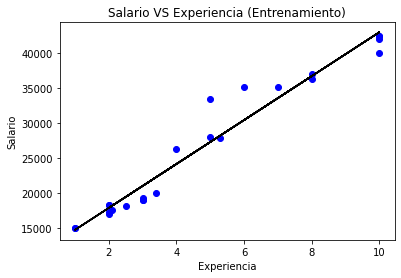

In [10]:

viz_train = plt
viz_train.scatter(X_train, Y_train, color = 'blue')
viz_train.plot(X_train, regressor.predict(X_train), color = 'black')
viz_train.title('Salario VS Experiencia (Entrenamiento)')
viz_train.xlabel('Experiencia')
viz_train.ylabel('Salario')
viz_train.show()



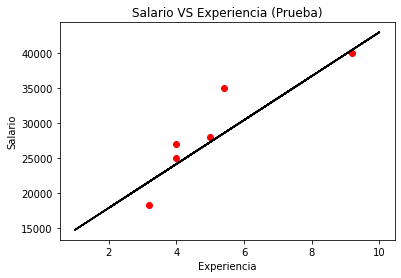

In [12]:
viz_test = plt
viz_test.scatter(X_test, Y_test, color = 'red')
viz_test.plot(X_train, regressor.predict(X_train), color='black')
viz_train.title('Salario VS Experiencia (Prueba)')
viz_train.xlabel('Experiencia')
viz_train.ylabel('Salario')
viz_test.show()

0.78 o el 78% de los nuevos datos que utilice para validar el aprendizaje de la máquina, lo hara de manera correcta.

In [13]:
regressor.score(X_test, Y_test)

0.7862437374732997

**Regresion Lineal Multiple**

In [14]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing


In [15]:
paises = ['CO','BR','PE','MX']

In [16]:
le1 = preprocessing.LabelEncoder()
paises_encoded = le1.fit_transform(paises)

In [17]:
paises_dataset = [random.choice(paises_encoded) for i in range(len(dataset))]

In [18]:
dataset['pais'] = paises_dataset

In [19]:
x = dataset.drop('Salario', axis=1)
y = dataset.iloc[:,1].values

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [21]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [22]:
print(regressor.score(X_test, Y_test))

0.7856144931297211


<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

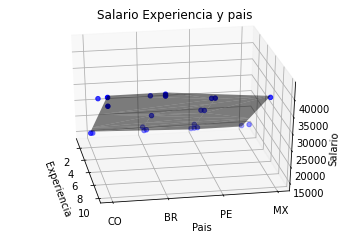

In [23]:
fig = plt.figure()
viz_train = fig.add_subplot(111, projection='3d')
viz_train.scatter(X_train['Aexperiencia'],X_train['pais'], Y_train, color = 'blue')
viz_train.plot_trisurf(X_train['Aexperiencia'],X_train['pais'], regressor.predict(X_train),color = 'black', alpha = 0.5)
viz_train.set_title('Salario Experiencia y pais')
viz_train.set_xlabel('Experiencia')
viz_train.set_ylabel('Pais')
viz_train.set_zlabel('Salario')
viz_train.set_yticks(range(len(paises_encoded)))
viz_train.set_yticklabels(le1.inverse_transform(paises_encoded))
viz_train.azim=-10
fig.show

<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

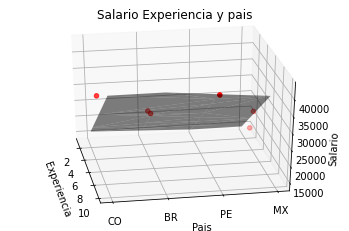

In [25]:
fig = plt.figure()
viz_train = fig.add_subplot(111, projection='3d')
viz_train.scatter(X_test['Aexperiencia'],X_test['pais'], Y_test, color = 'red')
viz_train.plot_trisurf(X_train['Aexperiencia'], X_train['pais'], regressor.predict(X_train),color = 'black', alpha = 0.5)
viz_train.set_title('Salario Experiencia y pais')
viz_train.set_xlabel('Experiencia')
viz_train.set_ylabel('Pais')
viz_train.set_zlabel('Salario')
viz_train.set_yticks(range(len(paises_encoded)))
viz_train.set_yticklabels(le1.inverse_transform(paises_encoded))
viz_train.azim=-10
fig.show